# backup codes

In [ ]:
# Define the function to compute the Discrete Fourier Transform (DFT)
def dft(theta, n):
    # Evaluate the function at each theta value
    f_values = cos(n * sin(theta / 2) * pi)
    # Compute the DFT
    dft_values = fft(f_values)
    modulus = absolute(dft_values)
    return modulus

# Define a higher resolution for theta values to capture more detail
num_points = 2**30
theta_high_res = arange(0, 2 * pi, 2 * pi / num_points)

# Compute wavenumber for the DFT
wavenumber_high_res = rfftfreq(num_points, d=2 * pi / num_points)

# Set up the plot
plt.figure(figsize=(10, 6))

# Compute and plot the DFT moduli for n values 2, 4, 8, 16
for n in [2, 4, 8, 16]:
    plt.loglog(wavenumber_high_res, dft(theta_high_res, n), label=f'n={n}')

# Add labels, legend, and title to the plot
plt.xlabel('Wavenumber', fontsize=14)
plt.ylabel('Modulus of DFT', fontsize=14)
plt.title('DFT Modulus on a log-log scale', fontsize=16)
plt.legend()
plt.grid(True, which="both", ls="-") # Enable grid lines for both major and minor ticks

# Show the plot
plt.show()

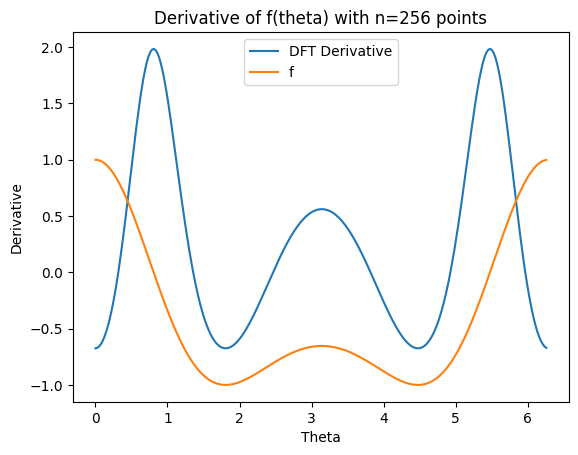

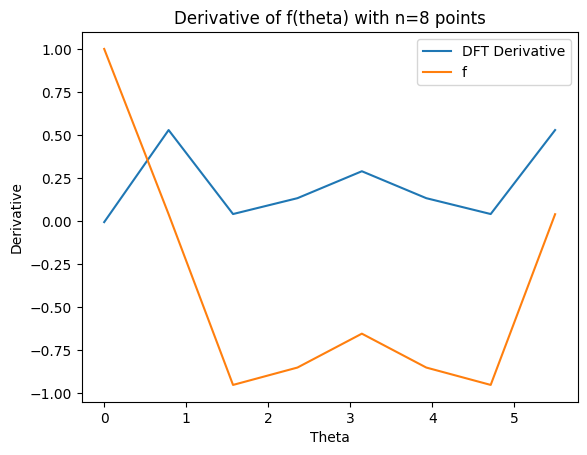

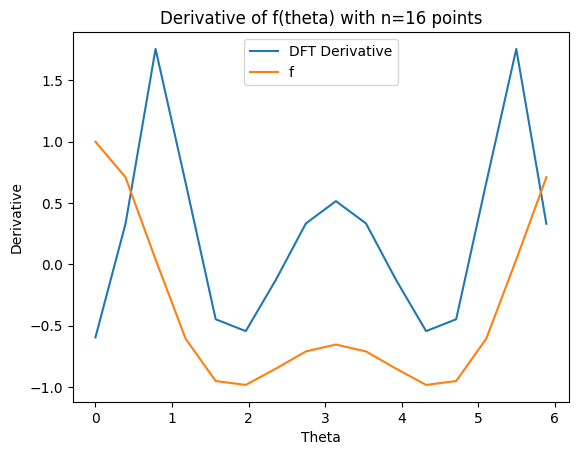

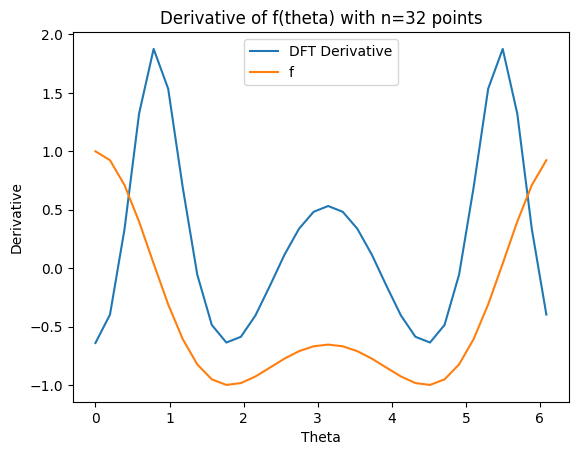

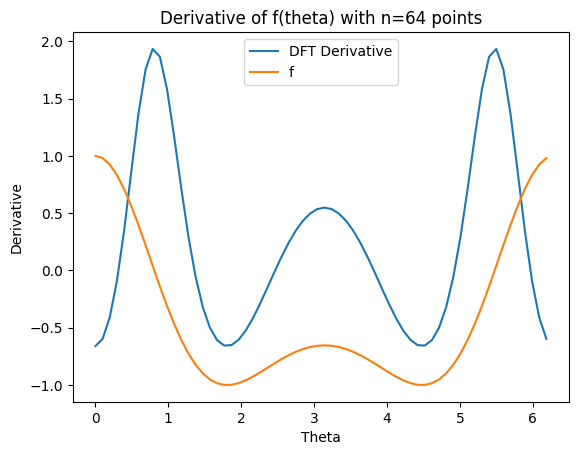

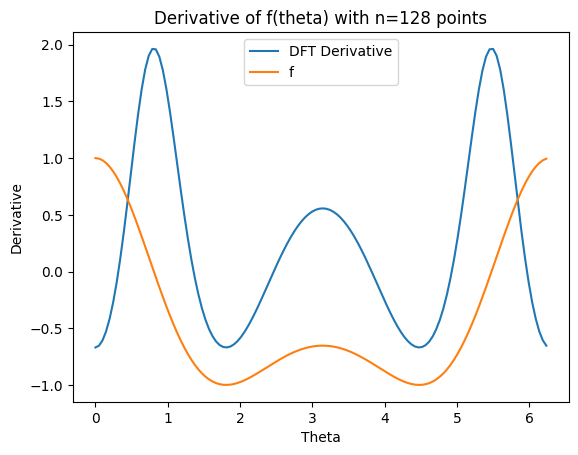

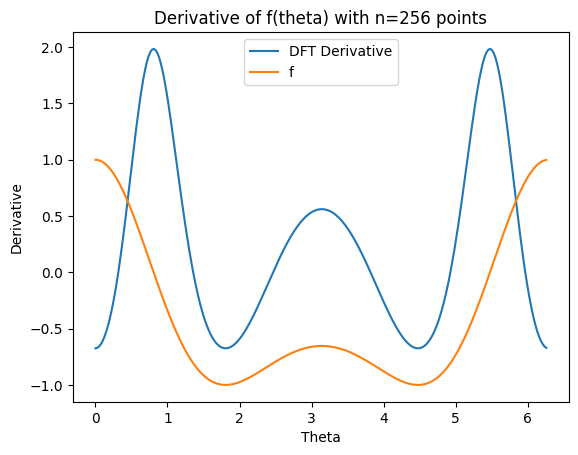

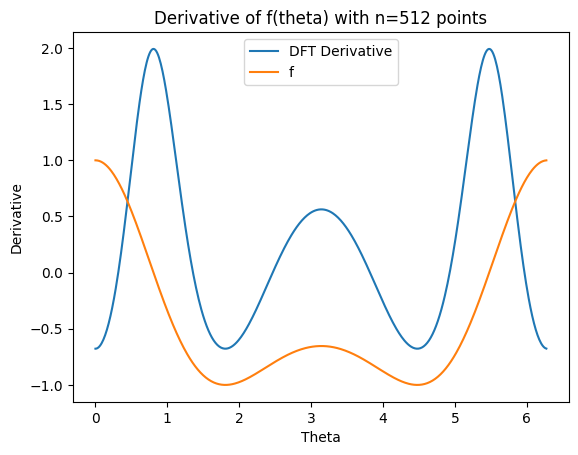

ValueError: x and y must have same first dimension, but have shapes (7,) and (8,)

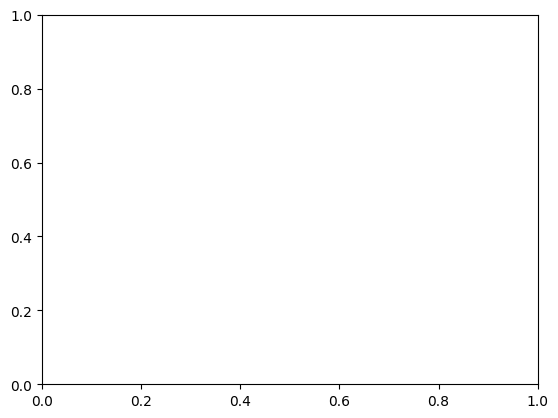

In [9]:
from pylab import *
import math



# def get_trig_interpolation_d(dft_results, d_theta, t_num: int = None):
#     if t_num is None:
#         n = len(dft_results)
#         # print(len(dft_results))
#     else:
#         n = t_num
#     a0 = dft_results[0].real / n  # The constant term (DC component) should not be doubled
#     an = (dft_results[1:n // 2].real * 2 / n).tolist()  # The cosine coefficients
#     bn = (-dft_results[1:n // 2].imag * 2 / n).tolist()  # The sine coefficients

#     # If n is even, the Nyquist frequency term should be handled separately and should not be doubled
#     if n % 2 == 0:
#         an.append(dft_results[n // 2].real / n)
#     else:  # If n is odd, the last term is still a part of the series and should be doubled
#         an.append(dft_results[n // 2].real * 2 / n)

#     # Function to calculate the trigonometric interpolation at a given point t
#     def trig_interpolation_d(t):
#         result = 0
#         for k in range(1, n // 2):
#             result += - an[k - 1] * np.sin(2 * np.pi * k * t / d_theta) * (2 * np.pi * k / d_theta)
#             result += bn[k - 1] * np.cos(2 * np.pi * k * t / d_theta) * (2 * np.pi * k / d_theta)
#         if n % 2 == 0:  # Add the Nyquist term
#             result += -an[-1] * np.sin(np.pi * (n // 2) * t / d_theta) * (np.pi * (n // 2) / d_theta)
#         return result

#     return trig_interpolation_d

# def get_trig_interpolation_d(dft_results, d_theta, t_num: int = None):
#     if t_num is None:
#         n = len(dft_results)
#     else:
#         n = t_num
#     a0 = dft_results[0].real / n  # The constant term (DC component) should not be doubled
#     an = (dft_results[1:n // 2].real * 2 / n).tolist()  # The cosine coefficients
#     bn = (-dft_results[1:n // 2].imag * 2 / n).tolist()  # The sine coefficients

#     # If n is even, the Nyquist frequency term should be handled separately and should not be doubled
#     if n % 2 == 0:
#         an.append(dft_results[n // 2].real / n)
#     else:  # If n is odd, the last term is still a part of the series and should be doubled
#         an.append(dft_results[n // 2].real * 2 / n)

#     # Function to calculate the trigonometric interpolation at a given point t
#     def trig_interpolation_function(t):
#         result = a0
#         for k in range(1, n // 2):
#             result += an[k - 1] * np.cos(2 * np.pi * k * t / d_theta)
#             result += bn[k - 1] * np.sin(2 * np.pi * k * t / d_theta)
#         if n % 2 == 0:  # Add the Nyquist term
#             result += an[-1] * np.cos(np.pi * (n // 2) * t / d_theta)
#         return result

#     return trig_interpolation_function

def get_trig_interpolation_d(dft_results, c, d, t_num: int = None):
    if t_num is None:
        n = len(dft_results)
    else:
        n = t_num
    a0 = dft_results[0].real / n  # The constant term (DC component) should not be doubled
    an = (dft_results[1:n // 2].real * 2 / n).tolist()  # The cosine coefficients
    bn = (-dft_results[1:n // 2].imag * 2 / n).tolist()  # The sine coefficients

    # If n is even, the Nyquist frequency term should be handled separately and should not be doubled
    if n % 2 == 0:
        an.append(dft_results[n // 2].real / n)
    else:  # If n is odd, the last term is still a part of the series and should be doubled
        an.append(dft_results[n // 2].real * 2 / n)

    # Function to calculate the trigonometric interpolation at a given point t
    def trig_interpolation_function(t):
        result = a0
        for k in range(1, n // 2):
            result += an[k - 1] * np.cos(2 * np.pi * k * t / (d - c))
            result += bn[k - 1] * np.sin(2 * np.pi * k * t / (d - c))
        if n % 2 == 0:  # Add the Nyquist term
            result += an[-1] * np.cos(np.pi * (n // 2) * t / (d - c))
        return result

    return trig_interpolation_function



def dftDerivative(f_values, c, d):
    # print(f"testing")
    dft_result = rfft(f_values)
    trig_interpolation_d = get_trig_interpolation_d(dft_result, c, d)
    return [trig_interpolation_d(i) for i in f_values]

def f(theta):
    return cos(4 * sin(theta/2))

def f_p(theta):
    return -2 * sin(4 * sin(theta/2)) * cos(theta/2)

interval = [2**n for n in range(3,10)]
absolute_errors = []
n = 256
theta = arange(0, 2*pi,2*pi/n)
d_theta = 2*pi/n
f_values = f(theta)
fp_values = f_p(theta)
derivative = dftDerivative(f_values, 0, 2 * pi)
max_error = max(abs(fp_values - derivative))
absolute_errors.append(max_error)


figure()
plot(theta, derivative, label='DFT Derivative')
plot(theta, f_values, label='f')
title(f'Derivative of f(theta) with n={n} points')
xlabel('Theta')
ylabel('Derivative')
legend()
show()

for n in interval:
    theta = arange(0, 2*pi,2*pi/n)
    d_theta = 2*pi/n
    f_values = f(theta)
    fp_values = f_p(theta)
    derivative = dftDerivative(f_values, 0, 2 * pi)
    max_error = max(abs(fp_values - derivative))
    absolute_errors.append(max_error)

    
    figure()
    plot(theta, derivative, label='DFT Derivative')
    plot(theta, f_values, label='f')
    title(f'Derivative of f(theta) with n={n} points')
    xlabel('Theta')
    ylabel('Derivative')
    legend()
    show()

plot(interval, absolute_errors)
xlabel("Number of Points", fontsize=20)
ylabel("Absolute Error", fontsize=20)
title("Absolute Error")

yscale('log')   
xscale('log')

Maximum Absolute Error: 2.3522850334245504e-15


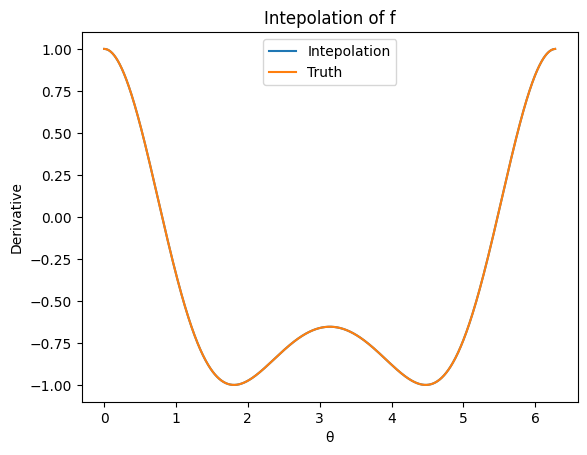

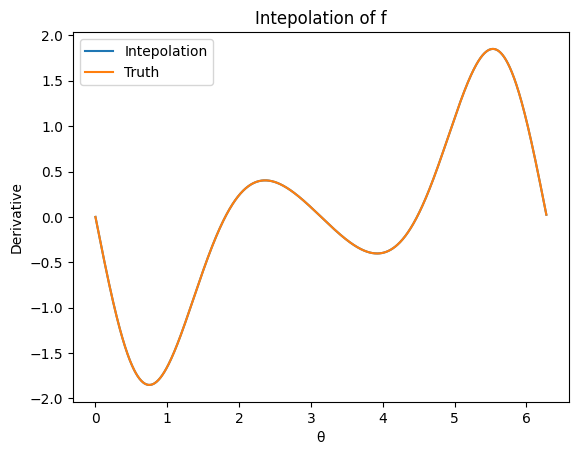

In [14]:
import numpy as np

def get_trig_interpolation(dft_results, c, d, t_num=None):
    if t_num is None:
        n = len(dft_results)
    else:
        n = t_num
    a0 = dft_results[0].real / n  # The constant term (DC component)
    an = (dft_results[1:n // 2].real * 2 / n).tolist()  # The cosine coefficients
    bn = (-dft_results[1:n // 2].imag * 2 / n).tolist()  # The sine coefficients

    # Handling the Nyquist frequency term
    if n % 2 == 0:
        an.append(dft_results[n // 2].real / n)
    else:
        an.append(dft_results[n // 2].real * 2 / n)

    # Function to calculate the trigonometric interpolation at a given point t
    def trig_interpolation_function(t):
        result = a0
        for k in range(1, n // 2):
            result += an[k - 1] * np.cos(2 * np.pi * k * t / (d - c))
            result += bn[k - 1] * np.sin(2 * np.pi * k * t / (d - c))
        if n % 2 == 0:
            result += an[-1] * np.cos(np.pi * (n // 2) * t / (d - c))
        return result

    return trig_interpolation_function

def get_trig_interpolation_di(dft_results, c, d, t_num=None):
    if t_num is None:
        n = len(dft_results)
    else:
        n = t_num
    a0 = dft_results[0].real / n  # The constant term (DC component)
    an = (dft_results[1:n // 2].real * 2 / n).tolist()  # The cosine coefficients
    bn = (-dft_results[1:n // 2].imag * 2 / n).tolist()  # The sine coefficients

    # Handling the Nyquist frequency term
    if n % 2 == 0:
        an.append(dft_results[n // 2].real / n)
    else:
        an.append(dft_results[n // 2].real * 2 / n)

    # Function to calculate the trigonometric interpolation at a given point t
    def trig_interpolation_function_d(t):
        result = 0
        for k in range(1, n // 2):
            result += -an[k - 1] * np.sin(2 * np.pi * k * t / (d - c)) * (2 * np.pi * k / (d - c))
            result += bn[k - 1] * np.cos(2 * np.pi * k * t / (d - c)) * (2 * np.pi * k / (d - c))
        if n % 2 == 0:
            result += -an[-1] * np.cos(np.pi * (n // 2) * t / (d - c)) * (np.pi * (n // 2) / (d - c))
        return result

    return trig_interpolation_function_d

def calc_f(f_values, c, d, theta):
    dft_result = np.fft.fft(f_values)
    trig_interpolation = get_trig_interpolation(dft_result, c, d, len(f_values))
    f_vs = [trig_interpolation(theta_i) for theta_i in theta]
    return f_vs

def calc_f_d(f_values, c, d, theta):
    dft_result = np.fft.rfft(f_values)
    trig_interpolation = get_trig_interpolation_di(dft_result, c, d, len(f_values))
    derivative_values = [trig_interpolation(theta_i) for theta_i in theta]
    return derivative_values

def f(theta):
    return np.cos(4 * np.sin(theta / 2))

def f_p(theta):
    return -2 * np.sin(4 * np.sin(theta/2)) * np.cos(theta/2)

# Define the interval and the number of points
n = 1024
theta = np.linspace(0, 2 * np.pi, n, endpoint=False)  # Create an array of theta values

# Compute the function values and the analytical derivative values
f_values = f(theta)
f_d = f_p(theta)

# Compute the derivative using DFT-based trigonometric interpolation
f_s = calc_f(f_values, 0, 2 * np.pi, theta)
f_s_d = calc_f_d(f_values, 0, 2 * np.pi, theta)

# Calculate the maximum absolute error
max_error = np.max(np.abs(f_values - f_s))
print("Maximum Absolute Error:", max_error)

# Plotting the results
import matplotlib.pyplot as plt

plt.figure()
plt.plot(theta, f_s, label='Intepolation')
plt.plot(theta, f_values, label='Truth')
plt.title(f'Intepolation of f')
plt.xlabel('θ')
plt.ylabel('Derivative')
plt.legend()
plt.show()

plt.figure()
plt.plot(theta, f_s_d, label='Intepolation')
plt.plot(theta, f_d, label='Truth')
plt.title(f'Intepolation of f')
plt.xlabel('θ')
plt.ylabel('Derivative')
plt.legend()
plt.show()
